In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## THIS CODE CHUNK TAKES UP TO 10 MINUTES TO RUN AS THE DATASET IS LARGE, PLEASE BE PATIENT!

url = "https://drive.google.com/file/d/11_5IO1fSNncMRPaZUfuKZl0Mp1mxFB4K/view?usp=drive_link"

token = pd.read_csv('https://drive.usercontent.google.com/download?id={}&export=download&authuser=0&confirm=t'.format(url.split('/')[-2]))
token

,block_number,transaction_index,from_address,to_address,time_stamp,contract_address,value
0,14669683,7,0xd30b438df65f4f788563b2b3611bd6059bff4ad9,0xda816e2122a8a39b0926bfa84edd3d42477e9efd,1651105815,0xdac17f958d2ee523a2206206994597c13d831ec7,18.670000
1,14669683,45,0x4941834ed1428089ee76252f6f9d767e800499b0,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,0xdac17f958d2ee523a2206206994597c13d831ec7,10000.000000
2,14669683,46,0x2c1f9a20711e14f8484a41123e20d1b06858ebea,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,0xdac17f958d2ee523a2206206994597c13d831ec7,9942.313005
3,14669683,47,0x7784c4f53aa5f03bd6d3ca670c9d9c887cc38cb0,0x3cd751e6b0078be393132286c442345e5dc49699,1651105815,0xdac17f958d2ee523a2206206994597c13d831ec7,234.364097
4,14669683,48,0x66589b8278470d58d4112f3d065de0f75734312e,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,0xdac17f958d2ee523a2206206994597c13d831ec7,9800.000000
...,...,...,...,...,...,...,...
28674506,15693289,338,0x55fe002aeff02f77364de339a1292923a15844b8,0x0000000000000000000000000000000000000000,1665110327,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,853.630000
28674507,15693289,342,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0x735a26a57a0a0069dfabd41595a970faf5e1ee8b,1665110327,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,3133.274260
28674508,15693289,20,0xbeefbabeea323f07c59926295205d3b7a17e8638,0x60594a405d53811d3bc4766596efd80fd545a270,1665110327,0x6b175474e89094c44da98b954eedeac495271d0f,5020.200000
28674509,15693289,186,0x53395e9e56f1b7fb3cd1fbd4c1195ef2dee71736,0x48da0965ab2d2cbf1c17c09cfb5cbe67ad5b1406,1665110327,0x6b175474e89094c44da98b954eedeac495271d0f,3921.972387


## Data Interpretation and Initial Checks

Based on some preliminary understanding of the data, each row in the dataset represents one ERC-20 token transfer event. The dataset columns are believed to have the following meaning:

- `block_number` and `transaction_index`: Used to order transactions chronologically on the blockchain.
- `from_address`: The address that sends the token.
- `to_address`: The address that receives the token.
- `time_stamp`: The time of the transaction.
- `contract_address`: The unique address on the blockchain that points to a specific smart contract.
- `value`: The size of the transfer, representing the amount of capital moved.

For our use case, the data types of the dataset columns are mostly alright. Perhaps one exception is the `time_stamp` column as conventional date or time columns are in string or datetime format. We will explore this column in greater detail later. 

In [2]:
token.dtypes

block_number           int64
transaction_index      int64
from_address          object
to_address            object
time_stamp             int64
contract_address      object
value                float64
dtype: object

Fortunately, there are no missing values in this dataset. 

In [3]:
token.isnull().sum()

block_number         0
transaction_index    0
from_address         0
to_address           0
time_stamp           0
contract_address     0
value                0
dtype: int64

The `time_stamp` column values seem to be 10-digit values. They are in Unix format, or seconds since 1 January 1970, 00:00:00 UTC. We will convert them to datetime format later to make them more human-readable. 

In [4]:
token["time_stamp"].astype(str).str.len().value_counts()

time_stamp
10    28674511
Name: count, dtype: int64

The `contract_address` column data seem to only take 1 of the following 6 values or categories: 

- **0xdac17f958d2ee523a2206206994597c13d831ec7**
- **0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48**
- **0x6b175474e89094c44da98b954eedeac495271d0f**
- **0xd2877702675e6ceb975b4a1dff9fb7baf4c91ea9**
- **0xa47c8bf37f92abed4a126bda807a7b7498661acd**
- **0x8e870d67f660d95d5be530380d0ec0bd388289e1**

On further Google searching, we find that these contract addresses correspond to the stablecoins listed in the ERC-20 zip folder. Specifically, 

- **0xdac17f958d2ee523a2206206994597c13d831ec7** is the identifier for USDT.
- **0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48** is the identifier for USDC.
- **0x6b175474e89094c44da98b954eedeac495271d0f** is the identifier for DAI.
- **0xd2877702675e6ceb975b4a1dff9fb7baf4c91ea9** is the identifier for Wrapped LUNC / LUNA / WLUNA.
- **0xa47c8bf37f92abed4a126bda807a7b7498661acd** is the identifier for USTC.
- **0x8e870d67f660d95d5be530380d0ec0bd388289e1** is the identifier for PAX / USDP.

In this case, the `contract_address` column probably identifies the stablecoins or cryptocurrency that is being transferred. We will replace the contract addresses with the stablecoin names later. 

In [5]:
token["contract_address"].value_counts()

contract_address
0xdac17f958d2ee523a2206206994597c13d831ec7    14650275
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48    11624559
0x6b175474e89094c44da98b954eedeac495271d0f     1738432
0xd2877702675e6ceb975b4a1dff9fb7baf4c91ea9      425747
0xa47c8bf37f92abed4a126bda807a7b7498661acd      179325
0x8e870d67f660d95d5be530380d0ec0bd388289e1       56173
Name: count, dtype: int64

The `value` column values are continuous. We first try to observe its distribution. However, due to some large values in the column, a log transformation is first performed on the data column before visualization to offer a more insightful view of the distribution.

From the histogram, it appears that the `value` data is rather symmetrically distributed, almost close to a normal distribution. From the boxplot, we observe there are quite a number of outliers though.

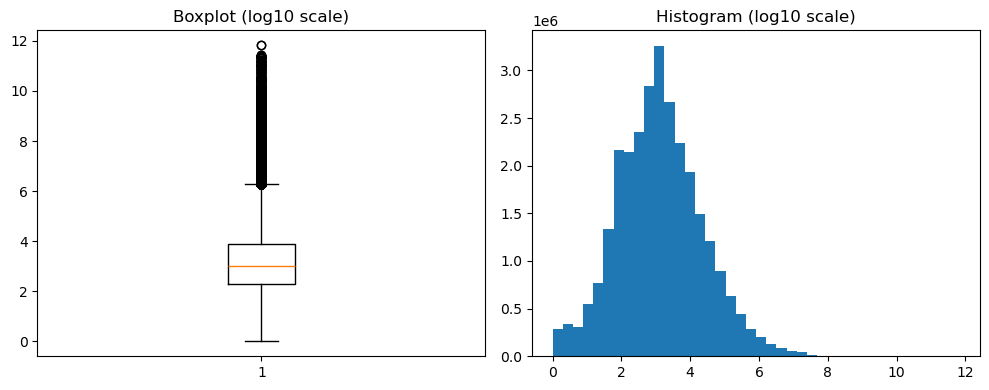

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].boxplot(np.log10(token["value"] + 1))
ax[0].set_title("Boxplot (log10 scale)")

ax[1].hist(np.log10(token["value"] + 1), bins=40)
ax[1].set_title("Histogram (log10 scale)")

plt.tight_layout()
plt.show()

Let's go one step further and display more summary statistics for this column of data:

In [7]:
summary_table = pd.DataFrame({
    "count": [token["value"].count()],
    "min": [token["value"].min()],
    "01_percentile": [token["value"].quantile(0.01)],
    "10_percentile": [token["value"].quantile(0.10)],
    "25_percentile": [token["value"].quantile(0.25)],
    "median": [token["value"].median()],
    "75_percentile": [token["value"].quantile(0.75)],
    "90_percentile": [token["value"].quantile(0.90)],
    "99_percentile": [token["value"].quantile(0.99)], 
    "max": [token["value"].max()],
    "tukey_lower_bound": token["value"].quantile(0.25) - 1.5 * (token["value"].quantile(0.75) - token["value"].quantile(0.25)),
    "tukey_upper_bound": token["value"].quantile(0.75) + 1.5 * (token["value"].quantile(0.75) - token["value"].quantile(0.25)) 
    }
)

summary_table

,count,min,01_percentile,10_percentile,25_percentile,median,75_percentile,90_percentile,99_percentile,max,tukey_lower_bound,tukey_upper_bound
0,28674511,0.0,0.951306,45.868511,196.0,1049.0,7696.109328,51171.625627,2.060236e+06,6.767923e+11,-11054.163992,18946.27332


In [8]:
tukey_upper_bound = token["value"].quantile(0.75) + 1.5 * (token["value"].quantile(0.75) - token["value"].quantile(0.25))
print(str(round((token["value"] <= tukey_upper_bound).mean() * 100, 2)) + "%")               

83.04%


It seems like there are some very large values in the `value` column. Only 83% of data values in the column fall below Tukey's upper bound (Q3 + 1.5 x IQR), and ~17% of the data values can be deemed as Tukey outliers. It appears that this column of values have a rather heavy right tail. 

But since the `value` column represents the amount of money transferred, large outlying values could genuinely (and reasonably) represent large amounts of money being transferred at that time. Hence, we will not drop any of these outliers. 

From the snapshot of the data above, it can be observed that the `to_address` column contains possibly nonsensical or erroneous addresses like **0x0000000000000000000000000000000000000000**. However, as we are unlikely to use the `from_address` and `to_address` columns for our project, we can treat this data quality issue as trivial. 

In [9]:
token.loc[token.duplicated(subset = ["block_number", "transaction_index"])]

,block_number,transaction_index,from_address,to_address,time_stamp,contract_address,value
125,14669686,216,0x74de5d4fcbf63e00296fd95d33236b9794016631,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,1651105845,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6938.750000
126,14669686,216,0x74de5d4fcbf63e00296fd95d33236b9794016631,0x2acf35c9a3f4c5c3f4c78ef5fb64c3ee82f07c45,1651105845,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,61.250000
129,14669686,236,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0x60594a405d53811d3bc4766596efd80fd545a270,1651105845,0x6b175474e89094c44da98b954eedeac495271d0f,753.652053
135,14669687,2,0x9008d19f58aabd9ed0d60971565aa8510560ab41,0x312784542ecc948d2605ded47540532b82852320,1651105881,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,1169.112379
139,14669687,104,0x6571d6be3d8460cf5f7d6711cd9961860029d85f,0x1116898dda4015ed8ddefb84b6e8bc24528af2d8,1651105881,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,5593.181400
...,...,...,...,...,...,...,...
28674456,15693287,154,0x3a6f3f9f9be94e1d985c6eb07eec891c4cb144b0,0x3416cf6c708da44db2624d63ea0aaef7113527c6,1665110303,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,4600.000000
28674466,15693289,4,0x4e68ccd3e89f51c3074ca5072bbac773960dfa36,0xb2f4c1d7587eecfc310355eb83726a39c2ee5d48,1665110327,0xdac17f958d2ee523a2206206994597c13d831ec7,288.439336
28674472,15693289,53,0xa81011ae274ef6debd3bdab634102c7b6c2c452d,0x757954435aadda27460bde45957d7824ce5a59a0,1665110327,0xdac17f958d2ee523a2206206994597c13d831ec7,1339.384696
28674476,15693289,61,0x8d90113a1e286a5ab3e496fbd1853f265e5913c6,0x4763e9c1052d22ff8580c97eb5edcb5eea534363,1665110327,0xdac17f958d2ee523a2206206994597c13d831ec7,2156.361456


## Data Cleaning

Most of the data in this dataset is rather clean already. Only two main changes need to be made: replacing the categories in the `contract_address` column with the corresponding stablecoin names and converting the Unix timestamps in the `time_stamp` column to datetime for better interpretability. 

In [10]:
contract_address_mapping = {
    "0xdac17f958d2ee523a2206206994597c13d831ec7": "USDT",
    "0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48": "USDC", 
    "0x6b175474e89094c44da98b954eedeac495271d0f": "DAI", 
    "0xd2877702675e6ceb975b4a1dff9fb7baf4c91ea9": "WLUNA", 
    "0xa47c8bf37f92abed4a126bda807a7b7498661acd": "USTC", 
    "0x8e870d67f660d95d5be530380d0ec0bd388289e1": "PAX"
}

token["contract_address"] = token["contract_address"].replace(contract_address_mapping)
token

,block_number,transaction_index,from_address,to_address,time_stamp,contract_address,value
0,14669683,7,0xd30b438df65f4f788563b2b3611bd6059bff4ad9,0xda816e2122a8a39b0926bfa84edd3d42477e9efd,1651105815,USDT,18.670000
1,14669683,45,0x4941834ed1428089ee76252f6f9d767e800499b0,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,USDT,10000.000000
2,14669683,46,0x2c1f9a20711e14f8484a41123e20d1b06858ebea,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,USDT,9942.313005
3,14669683,47,0x7784c4f53aa5f03bd6d3ca670c9d9c887cc38cb0,0x3cd751e6b0078be393132286c442345e5dc49699,1651105815,USDT,234.364097
4,14669683,48,0x66589b8278470d58d4112f3d065de0f75734312e,0x28c6c06298d514db089934071355e5743bf21d60,1651105815,USDT,9800.000000
...,...,...,...,...,...,...,...
28674506,15693289,338,0x55fe002aeff02f77364de339a1292923a15844b8,0x0000000000000000000000000000000000000000,1665110327,USDC,853.630000
28674507,15693289,342,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0x735a26a57a0a0069dfabd41595a970faf5e1ee8b,1665110327,USDC,3133.274260
28674508,15693289,20,0xbeefbabeea323f07c59926295205d3b7a17e8638,0x60594a405d53811d3bc4766596efd80fd545a270,1665110327,DAI,5020.200000
28674509,15693289,186,0x53395e9e56f1b7fb3cd1fbd4c1195ef2dee71736,0x48da0965ab2d2cbf1c17c09cfb5cbe67ad5b1406,1665110327,DAI,3921.972387


The `contract_address` column values are now changed to the names of the stablecoins.

In [11]:
token["time_stamp"] = pd.to_datetime(token["time_stamp"], unit = "s", utc = True)
token

,block_number,transaction_index,from_address,to_address,time_stamp,contract_address,value
0,14669683,7,0xd30b438df65f4f788563b2b3611bd6059bff4ad9,0xda816e2122a8a39b0926bfa84edd3d42477e9efd,2022-04-28 00:30:15+00:00,USDT,18.670000
1,14669683,45,0x4941834ed1428089ee76252f6f9d767e800499b0,0x28c6c06298d514db089934071355e5743bf21d60,2022-04-28 00:30:15+00:00,USDT,10000.000000
2,14669683,46,0x2c1f9a20711e14f8484a41123e20d1b06858ebea,0x28c6c06298d514db089934071355e5743bf21d60,2022-04-28 00:30:15+00:00,USDT,9942.313005
3,14669683,47,0x7784c4f53aa5f03bd6d3ca670c9d9c887cc38cb0,0x3cd751e6b0078be393132286c442345e5dc49699,2022-04-28 00:30:15+00:00,USDT,234.364097
4,14669683,48,0x66589b8278470d58d4112f3d065de0f75734312e,0x28c6c06298d514db089934071355e5743bf21d60,2022-04-28 00:30:15+00:00,USDT,9800.000000
...,...,...,...,...,...,...,...
28674506,15693289,338,0x55fe002aeff02f77364de339a1292923a15844b8,0x0000000000000000000000000000000000000000,2022-10-07 02:38:47+00:00,USDC,853.630000
28674507,15693289,342,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0x735a26a57a0a0069dfabd41595a970faf5e1ee8b,2022-10-07 02:38:47+00:00,USDC,3133.274260
28674508,15693289,20,0xbeefbabeea323f07c59926295205d3b7a17e8638,0x60594a405d53811d3bc4766596efd80fd545a270,2022-10-07 02:38:47+00:00,DAI,5020.200000
28674509,15693289,186,0x53395e9e56f1b7fb3cd1fbd4c1195ef2dee71736,0x48da0965ab2d2cbf1c17c09cfb5cbe67ad5b1406,2022-10-07 02:38:47+00:00,DAI,3921.972387


The `time_stamp` values are now converted to datetime type. 